# ADS 2023 spring Week 12 Exercises
Exercises for Algorithms and Data Structures at ITU. The exercises are from *Algorithms, 4th Edition* by Robert Sedgewick and Kevin Wayne unless otherwise specified. Color-coding of difficulty level and alterations to the exercises (if any) are made by the teachers of the ADS course at ITU.

**<span style="background: LimeGreen">1 - Green</span>**  Hand-run Prim’s, Kruskal’s and Dijkstra’s algorithm on the small example graph
below, and write down the order in which the edges of the graph are explored. (For Prim and
Dijkstra, the graph exploration should start at vertex A.)  
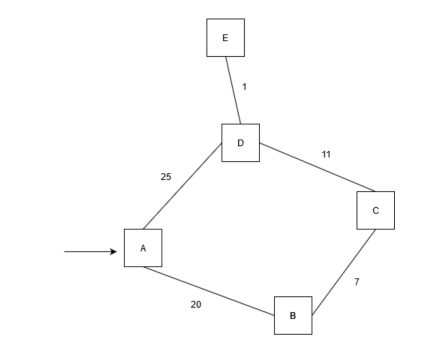

*Solution*:  
Prim's:  
20, 7, 11, 1  
Kruskal's:  
1, 7, 11, 20  
Dijkstra's:  
20, 25, 7, 1, 11

**<span style="background: LimeGreen">4.3.1 - Green</span>**  Prove that you can rescale the weights by adding a positive constant to all of
them or by multiplying them all by a positive constant without affecting the MST.  

*Solution*:  
Let $v$ and $w$ be any two edges with distinct edge weight. Say $v>w$ is true. Then a constant is added to all edge weights. This is equal to the following operation on the inequality: $v+c>w+c$. By the rules of algebra, the inequality does not change. The same is true for multiplying a constant.

**<span style="background: LimeGreen">4.3.7 - Green</span>**  Describe how you would find a maximum spanning tree of an edge-weighted
graph.

*Solution*:  
The Cut property states that of the crossing edges between two cuts, the edge with the smallest weight will be part of the MST. The same reasoning used for that proof, can also be applied to the idea that the crossing edge with maximum weight will be part of the maximum spanning tree. Therefore, as both Prim's and Kruskal's algorithms rely on the cut property to function, they are both able to find the maximum spanning tree if they are changed to look for the largest weight instead of the smallest.

**<span style="background: LimeGreen">4.3.12 - Green</span>**  Suppose that a graph has distinct edge weights. Does its shortest edge
have to belong to the MST? Can its longest edge belong to the MST? Does a min-weight edge
on every cycle have to belong to the MST? Argue for your answer to each question or give a
counterexample.

*Solution*:  
a) "Does its shortest edge have to belong to the MST?"  
Yes. For any cut where the shortest edge is a crossing edge, by the cut property, it will be in the MST. It is impossible to make a cut where the smallest edge is a crossing edge, but is not part of the MST.  
  
b) "Can its longest edge below to the MST?"  
Yes. Though only in the case that it is the only crossing edge in a cut. That is, the MST is forced to use the largest edge if it is the sole edge connecting two subgraphs. For example, if there exists a vertex whose only edge is the largest edge, that edge will be part of the MST.  
  
c) "Does a min-weight edge on every cycle have to belong to the MST?"  
Yes. Making a cut in a cycle will result in at least 2 crossing edges. It is always possible to make a cut where the smallest edge in the cycle is a crossing edge. By the cut property, it will then be part of the MST.  

**<span style="background: Yellow">4.3.3 - Yellow</span>**  Show that if a graph’s edges all have distinct weights, the MST is unique.

*Solution*:  
In a graph where all edges have distinct weights, we assume the MST is NOT unique. We label the MST $T_1$. This means that there exists a tree (labeled $T_2$) with at least 1 different edge that has the same total weight.  
Let $v$ be the edge $v\in T_1, v\notin T_2$ and $w$ be the edge $w\in T_2, w\notin T_1$. For the two trees to have the same weight, $w$ and $v$ must also have the same weight. This is not possible, as all edges have distinct weights. Therefore, $T_2$ is not possible.

**<span style="background: Yellow">4.3.4 - Yellow</span>**  Consider the assertion that an edge-weighted graph has a unique MST only
if its edge weights are distinct. Give a proof or a counterexample.

*Solution*:  
This is only true in some cases. An MST has exactly $|V|-1$ edges, where $V$ is the set of vertices in the graph. By the cut property, these $|V|-1$ edges *must* be the $|V|-1$ edges in the graph with the smallest weights (Kruskal's algorithm operates on the basis of this). Let's say only two of the edges in the graph share the same weight. If those two edges are not in the top $|V|-1$ edges, the MST is unique. Likewise, if those two edges are both in the top $|V|-1$ edges, the MST is also unique.  
If, however, the edges lay on the boundary, and only one of the two edges gets to be part of the top $|V|-1$ edges, there exists two MSTs: one with the first edge, and one with the second.  
(All of these arguments assume that both edges will be used in the MST and do not cause cycles.)

**<span style="background: Yellow">4.3.14 - Yellow</span>**  Given an MST for an edge-weighted graph G, suppose that an edge in G
that does not disconnect G is deleted. Describe how to find an MST of the new graph in time
proportional to E.

*Solution (beware: chatgpt)*:  
If an edge is deleted from an MST, it results in two disconnected components of the graph. Let's assume that we delete the edge (u, v) from the MST, where u and v are two vertices in the graph. Deleting this edge splits the MST into two disconnected components: T1 and T2, where T1 contains u and T2 contains v.

To find an MST of the new graph, we need to add back an edge that connects T1 and T2. The new edge must be chosen in such a way that it has the lowest weight among all edges that connect T1 and T2. We can find such an edge in time proportional to E by following these steps:

1. Starting from T1, perform a depth-first search (DFS) or breadth-first search (BFS) traversal of the graph. During the traversal, keep track of all edges that are encountered that lead to vertices in T2.
2. Among all the edges that lead to vertices in T2, choose the one with the lowest weight. This edge will be the new edge that connects T1 and T2.
3. Once the new edge is identified, add it to the graph to connect T1 and T2.
4. The resulting graph is now connected, and we can apply any standard algorithm, such as Kruskal's algorithm or Prim's algorithm, to find an MST of the new graph.

Overall, the time complexity of this approach is proportional to the number of edges in the graph, which is O(E).  
  
**HUMAN**:  
I can't see how this is possible without the assumption that the deleted edge is *also* in the MST.

**<span style="background: Yellow">Exam 190820 4.A - Yellow</span>**  **Deisgn of algorithms**  
The world consists of $R$ rows and $C$ columns of six-sided tiles. A tile is either grass (G), lava (L) or a
certain depth of water (given as a positive integer between $1$ and $RC$, in centimeters, of depth below the
surface). Here are some examples, with $R = 1$ and $C = 8$:  
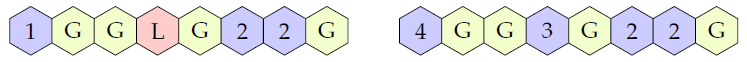  
  
Your goal is to lower the water level of the world (as little as possible), turning water tile into grass
tiles, so that all grass tiles become connected and the inhabitants in the world can visit each other. More
precisely, every pair of G-tiles must be connected by a sequence of neighbouring G-tiles. (You can pretend
that you are the chief engineer of terraforming on a new interplanetary space colonialisation mission. Or
you are some kind of god. Or you are a climate scientist making models. Or it’s a video game. Whatever.)
It takes one day to decrease the water level in the world by one centimeter, equivalently, to decrease
the depth of every water tile by $1$. When a water tile is at depth $0$, it becomes a grass tile. Lava tiles are
unaffected by the water level. In the example to the right, the goal can be achieved in three days. In the
example to the left, the goal is impossible to achieve.
The travel time for the inhabitants is not important. (You can imagine that they are infinitely fast and
in infinitely good shape, except unable to swim. Or maybe they have access to these very fast electric
scooters you see everywhere now.)  
  
(a) Assume $R = 1$. Give a detailed description, preferably using pseudocode, of an algorithm that
computes the minimum time (in number of days, as an integer) before all grass tiles are connected,
or writes `impossible`. You can assume that the input is given as a one-dimensional array $T[c]$ of
integers with $0\leq c<C$, and where $0$ means ‘G’ and $−1$ means ‘L’.  

*Solution*:  
Since $0\leq c<C$ implies that $-1$ can never happen, it is impossible to get lava tiles. I assume this is an error and it is actually suppose to be $-1\leq c<C$.  
  
```
lGround = None
rGround = None

for i=0 to len(T):
  if T[i] == 0:
    lGround = i
    break
for i=len(T)-1 to 0:
  if T[i] == 0:
    rGround = i

# check if lava between the ground tiles
for i=lGround to rGround:
  if T[i] == -1:
    return "impossible"

# find deepest water between the ground tiles
depth = 0
for i=lGround to rGround:
  if T[i] > depth:
    depth = T[i]

return depth
```

**<span style="background: Red">4.3.32 - Red</span>**  *Specified set*. Given a connected edge-weighted graph G and a specified set of
edges S (having no cycles), describe a way to find a minimum-weight spanning tree of G that
contains all the edges in S.

*Solution*:  
You can use Kruskal's algorithm. Modify it to add all the edges in S to the MST first. Then continue normal operation from there. This will continue building the MST from the edges in S, ensuring no cycles are formed.  

**<span style="background: Red">Exam 190820 4.B - Red</span>**  **Design of algorithms** (cont.)  
(b) Same question as above, but now we no longer assume $R = 1$. Here are two example worlds,
both with answer “two days”:  
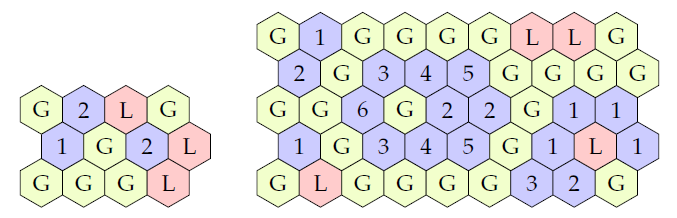  
You can assume that the input is given as a two-dimensional array $T[r][c]$ of integers; with $0\leq r<R$
and $0\leq c<C$, and where $0$ means ‘G’ and $−1$ means ‘L’. Let’s agree that $T[0][0]$ describes the
north–west-most tile, $T[0][1]$ its neighbour to the east, and $T[1][0]$ its neighbour to the south–east.
For instance, the example world to the left is encoded as $[[0, 2,−1, 0], [1, 0, 2,−1], [0, 0, 0,−1]]$.  
  
Maybe you want to model the problem as a graph problem. In that case, your explanation must
include a careful and complete drawing of the final graph corresponding to the example world to
the left (the smaller one). It must be clear if the graph is undirected or directed, and which weights
(if any) are on the edges. In general, how many vertices and how many edges (asymptotically) does
the graph maximally have, in terms of $R$ and $C$?
Describe your algorithm, preferably in precise prose rather than pseudocode. State the total running
time of your algorithm in terms of $R$ and $C$.  

*Solution*:  
idk